In [24]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq
import re
import datetime
import os
import time

import plotly.offline as pyo 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

color_set = {
        "dark_red"       : "#6f1926",
        "red"            : "#de324c",
        "orange"         : "#f4895f",
        "yellow"         : "#f8e16f",
        "bright_green"   : "#8bc34a",
        "dark_green"     : "#009688", #"#318a01",
        "blue"           : "#369acc",
        "sky_blue"       : "#80d9ff",
        "dark_blue"      : "#0057e5",
        "violet"         : "#9656a2",
        "purple"         : "#7b4fff",
        "black"          : "#212020",
        "gray"           : "#777675"
    }

In [33]:
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-081114.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084343.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084944.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240907-095717.xlsx'

In [34]:
xls = pd.ExcelFile(stock_excel_filepath)

df_basic_info               = pd.read_excel(xls, "Basic Info") # Top Ratios
df_top_ratios               = pd.read_excel(xls, "Top Ratios") # Top Ratios
df_quaterly_results         = pd.read_excel(xls, "Quarterly Results") # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, "Profit & Loss") # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, "Compounded Sales Growth") # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, "Compounded Profit Growth") # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, "Stock Price CAGR") # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, "Return on Equity") # Return on Equity
df_balance_sheet            = pd.read_excel(xls, "Balance Sheet") # Balance Sheet
df_cash_flows               = pd.read_excel(xls, "Cash Flows") # Cash Flows
df_ratios                   = pd.read_excel(xls, "Ratios") # Ratios
df_shareholding_pattern     = pd.read_excel(xls, "Shareholding Pattern") # Shareholding Pattern

In [56]:
df = df_shareholding_pattern

,Shareholding Pattern,Stockname,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
0,Promoters,UNITDSPR,56.73,56.73,56.73,56.73,56.74,56.74,56.68,56.68,56.68,56.68,56.68,56.68
1,FIIs,UNITDSPR,19.08,17.94,17.73,16.76,16.07,15.98,15.38,15.92,16.51,16.23,16.68,15.09
2,DIIs,UNITDSPR,9.65,10.41,10.41,10.85,11.61,12.08,12.70,12.64,12.32,12.49,12.27,14.00
3,Government,UNITDSPR,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,Public,UNITDSPR,14.53,14.92,15.12,15.65,15.58,15.20,15.24,14.77,14.49,14.60,14.37,14.22
5,No. of Shareholders,UNITDSPR,191699.00,234926.00,241111.00,252264.00,274307.00,258189.00,268993.00,249395.00,249741.00,264583.00,251095.00,252121.00
6,Promoters,UBL,72.71,72.71,72.71,72.71,72.72,72.72,72.72,72.72,71.00,70.84,70.84,70.84
7,FIIs,UBL,9.78,9.61,8.70,7.69,6.93,6.94,6.43,6.31,6.70,6.71,6.63,6.43
8,DIIs,UBL,10.49,10.90,11.92,13.01,13.87,13.91,14.41,14.65,15.97,16.06,16.12,16.38
9,Government,UBL,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16


In [60]:
df = df_shareholding_pattern
df

,Shareholding Pattern,Stockname,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
0,Promoters,UNITDSPR,56.73,56.73,56.73,56.73,56.74,56.74,56.68,56.68,56.68,56.68,56.68,56.68
1,FIIs,UNITDSPR,19.08,17.94,17.73,16.76,16.07,15.98,15.38,15.92,16.51,16.23,16.68,15.09
2,DIIs,UNITDSPR,9.65,10.41,10.41,10.85,11.61,12.08,12.70,12.64,12.32,12.49,12.27,14.00
3,Government,UNITDSPR,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,Public,UNITDSPR,14.53,14.92,15.12,15.65,15.58,15.20,15.24,14.77,14.49,14.60,14.37,14.22
5,No. of Shareholders,UNITDSPR,191699.00,234926.00,241111.00,252264.00,274307.00,258189.00,268993.00,249395.00,249741.00,264583.00,251095.00,252121.00
6,Promoters,UBL,72.71,72.71,72.71,72.71,72.72,72.72,72.72,72.72,71.00,70.84,70.84,70.84
7,FIIs,UBL,9.78,9.61,8.70,7.69,6.93,6.94,6.43,6.31,6.70,6.71,6.63,6.43
8,DIIs,UBL,10.49,10.90,11.92,13.01,13.87,13.91,14.41,14.65,15.97,16.06,16.12,16.38
9,Government,UBL,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16


In [63]:
df[df['Shareholding Pattern'] == 'Government']

,Shareholding Pattern,Stockname,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
3,Government,UNITDSPR,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,Government,UBL,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16
15,Government,RADICO,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
if not df[ (df['Stockname'] == 'SULA') & (df['Shareholding Pattern'] == 'Government') ].empty:
    print('What')

array(['10 Years', '5 Years', '3 Years', 'TTM'], dtype=object)

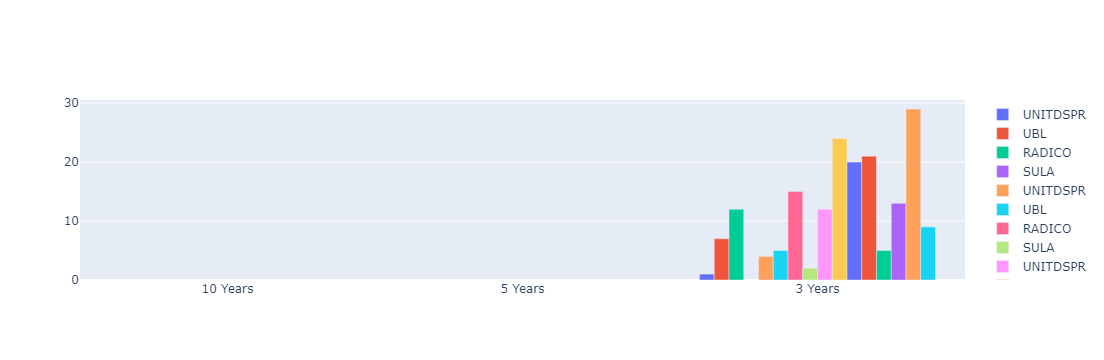

In [48]:

fig = go.Figure()


# List of quarters
x = df['Compounded Sales Growth'].unique()


# Add traces for each metric
for result in df['Compounded Sales Growth'].unique():
    for stock in df['Stockname'].unique():
        fig.add_trace(go.Bar(
            x=x,
            y=df[ (df['Stockname'] == stock) & (df['Compounded Sales Growth'] == result) ].iloc[0,:],
            name=f'{stock}'
        ))

fig.update_layout()
fig.show()


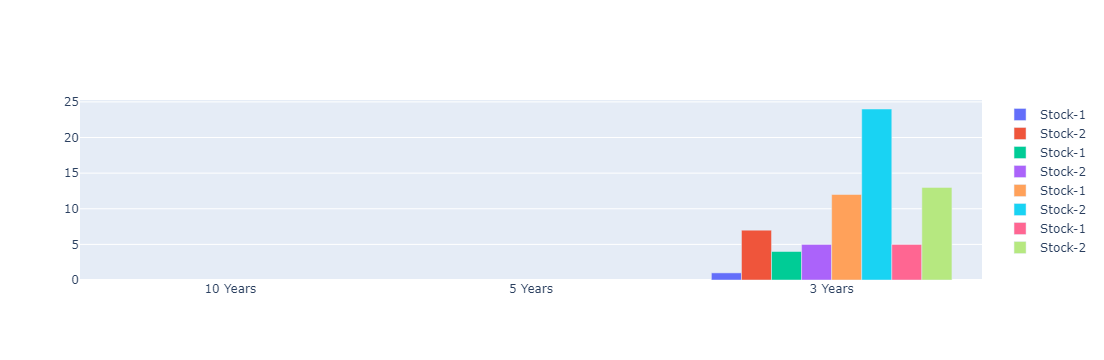

In [51]:
mydict = {
  'Compounded Sales Growth' : ['10 Years', '5 Years', '3 Years', 'TTM', '10 Years', '5 Years', '3 Years', 'TTM'],
  'Stockname' : ['Stock-1','Stock-1','Stock-1','Stock-1','Stock-2','Stock-2','Stock-2','Stock-2'],
  'Compounded Sales Growth.1' : [1, 4, 12, 5, 7, 5, 24, 13]
}

df = pd.DataFrame(mydict)

fig = go.Figure()

# List of quarters
x = df['Compounded Sales Growth'].unique()

# Add traces for each metric
for result in df['Compounded Sales Growth'].unique():
    for stock in df['Stockname'].unique():
        fig.add_trace(go.Bar(
            x=x,
            y=df[ (df['Stockname'] == stock) & (df['Compounded Sales Growth'] == result) ].iloc[0,:],
            name=f'{stock}'
        ))

fig.update_layout()
fig.show()